In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Normalize
from sklearn.preprocessing import normalize

from sklearn import datasets, svm, tree, preprocessing, metrics
from sklearn.preprocessing import StandardScaler

# Iterators for search grid
import itertools

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(X_test, y_test, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = metrics.confusion_matrix(y_test, model.predict(X_test))
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    #print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()

In [3]:
# Score models
from sklearn import metrics

def score_report(X_test, y_test):
    print("Test accuracy: ", model.score(X_test, y_test))
    print("")
    print(metrics.classification_report(y_test, model.predict(X_test)))
    plot_confusion_matrix(X_test, y_test, classes="", normalize=True, title="")

In [4]:
# Load dataset
path = "datasets\\"
filename = "iris.data.txt"

df = pd.read_csv(path + filename, sep=",", decimal=",", header=None, names=None)

In [1314]:
df.sample(10)

,0,1,2,3,4
14,5.8,4.0,1.2,0.2,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
13,4.3,3.0,1.1,0.1,Iris-setosa
83,6.0,2.7,5.1,1.6,Iris-versicolor
38,4.4,3.0,1.3,0.2,Iris-setosa
75,6.6,3.0,4.4,1.4,Iris-versicolor
129,7.2,3.0,5.8,1.6,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa


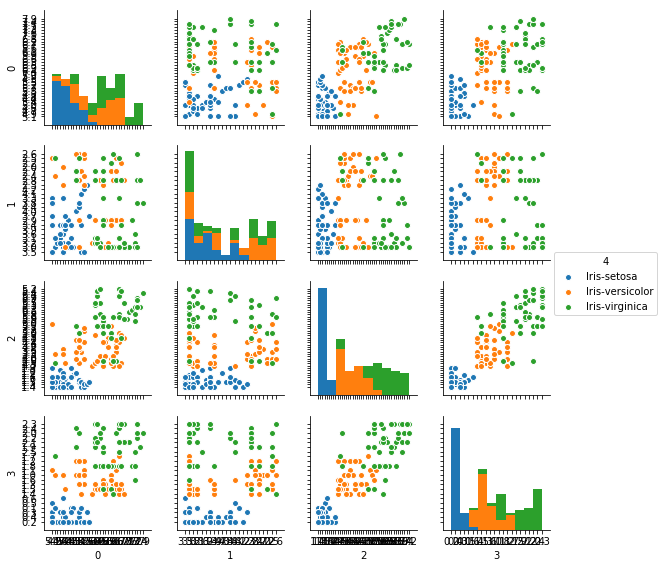

In [6]:
# Scatter plot
sns.pairplot(df, hue=4, size=2)

In [7]:
df_p = df.copy()

In [1045]:
df_p.describe()

,0,1,2,3,4_Iris-setosa,4_Iris-versicolor,4_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [1055]:
df_p.agg(["median", "nunique", "var", "prod"])

,0,1,2,3,4_Iris-setosa,4_Iris-versicolor,4_Iris-virginica
median,5.800000e+00,3.000000e+00,4.350000e+00,1.300000e+00,0.000000,0.000000,0.000000
nunique,3.500000e+01,2.300000e+01,4.300000e+01,2.200000e+01,2.000000,2.000000,2.000000
var,6.856935e-01,1.880040e-01,3.113179e+00,5.824143e-01,0.223714,0.223714,0.223714
prod,2.257440e+114,1.197477e+72,3.774489e+76,2.972714e-12,0.000000,0.000000,0.000000


In [9]:
# Encode categorical data and convert rest to numberic
df_p = pd.get_dummies(df_p, columns=[4])
df_p = df_p.apply(pd.to_numeric)

#df_p[4] = preprocessing.LabelEncoder().fit_transform(df_p[4])

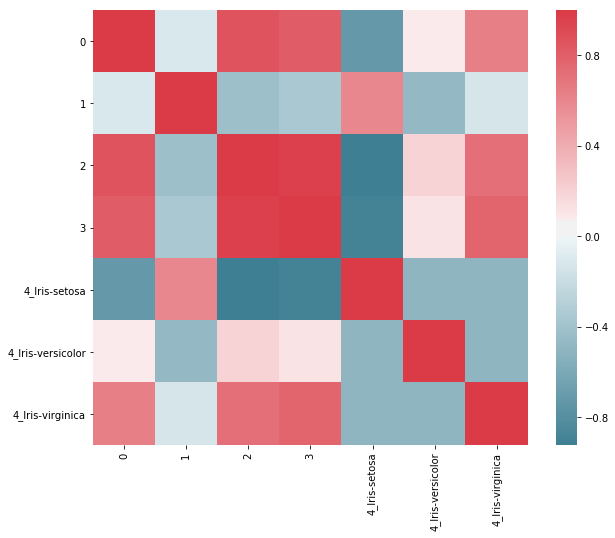

In [867]:
# Check correlations
corr = df_p.corr()
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [1163]:
df = df.drop_duplicates()

In [1164]:
y = df.loc[:, [4]]
X = df.drop([4], axis=1)

In [1165]:
X = X.apply(pd.to_numeric)

In [1166]:
# Convert to numpy
y = y.values
X = X.values

y = y.ravel()

In [1167]:
X[:, 1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.2, 3.5, 3. , 3.4, 3.5,
       2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3,
       2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9, 3.1, 3. ,
       2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. , 2.9, 2.6,
       2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6, 3. , 2.6,
       2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. ,
       2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6,
       2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8, 3.8,
       2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 3.2, 3.3, 3. ,
       2.5, 3. , 3.4, 3. ])

In [1168]:
rows, columns = X.shape
Z = np.zeros([rows, columns+6])

In [1169]:
# Feature crosses
Z[:, 0] = X[:, 0]
Z[:, 1] = X[:, 1]
Z[:, 2] = X[:, 2]
Z[:, 3] = X[:, 3]

Z[:, 4] = X[:, 0] * X[:, 1]
Z[:, 5] = X[:, 0] * X[:, 2]
Z[:, 6] = X[:, 0] * X[:, 3]

Z[:, 7] = X[:, 1] * X[:, 2]
Z[:, 8] = X[:, 1] * X[:, 3]

Z[:, 9] = X[:, 2] * X[:, 3]

In [1170]:
Z

array([[ 5.1 ,  3.5 ,  1.4 , ...,  4.9 ,  0.7 ,  0.28],
       [ 4.9 ,  3.  ,  1.4 , ...,  4.2 ,  0.6 ,  0.28],
       [ 4.7 ,  3.2 ,  1.3 , ...,  4.16,  0.64,  0.26],
       ...,
       [ 6.5 ,  3.  ,  5.2 , ..., 15.6 ,  6.  , 10.4 ],
       [ 6.2 ,  3.4 ,  5.4 , ..., 18.36,  7.82, 12.42],
       [ 5.9 ,  3.  ,  5.1 , ..., 15.3 ,  5.4 ,  9.18]])

In [1171]:
# Normalize
#X = normalize(X, norm="l2", axis=1, copy=True, return_norm=False)
#X

In [1172]:
# Manual normalization
#X[:, 0] = X[:, 0] / X[:, 0].max()
#X[:, 1] = X[:, 1] / X[:, 1].max()
#X[:, 2] = X[:, 2] / X[:, 2].max()
#X[:, 3] = X[:, 3] / X[:, 3].max()

In [1173]:
# PCA
#from sklearn.decomposition import PCA

#pca = PCA(n_components = 8)
#principalComponents = pca.fit_transform(Z)
#Z = pd.DataFrame(data = principalComponents)

### Normalize after PCA
#Z = normalize(X, norm="l2", axis=1, copy=True, return_norm=False)

In [1483]:
# Split data
# Random state set for experimentation with same sets!
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

In [1484]:
# Time function (prediction time)
import timeit, functools
t = timeit.Timer(functools.partial(model.predict, X_test))
print ("Avg. time:", t.timeit(1000), "seconds.")

Avg. time: 0.08868319999601226 seconds.


In [1485]:
# Modeller

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


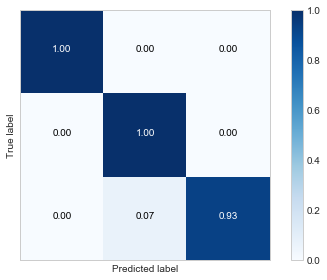

In [1486]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


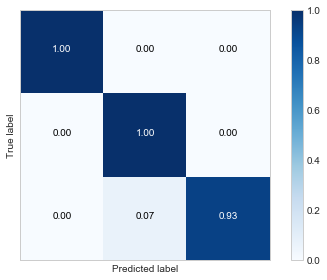

In [1487]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5) 
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


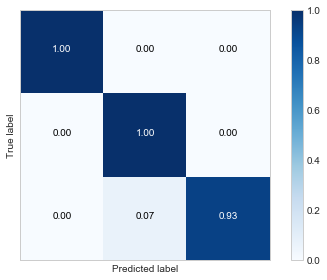

In [1488]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=1)
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


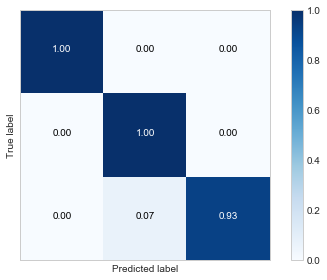

In [1489]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=2, random_state=1)
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


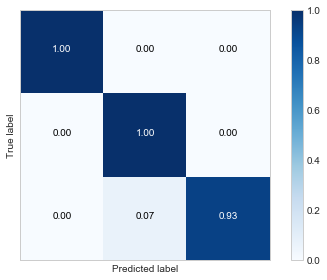

In [1490]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=1, random_state=1)
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


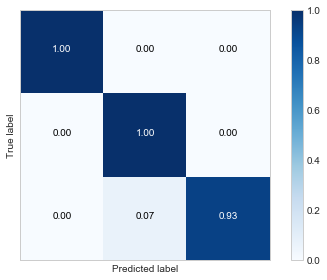

In [1491]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=5, random_state=1)
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


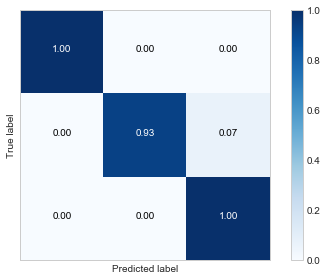

In [1492]:
from sklearn import svm

model = svm.LinearSVC(C=0.05)
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


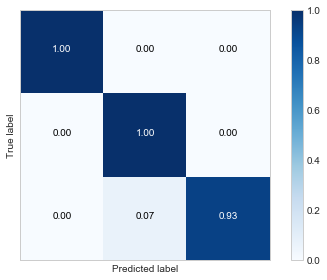

In [1493]:
model = svm.SVC(kernel='linear', C=0.4)
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


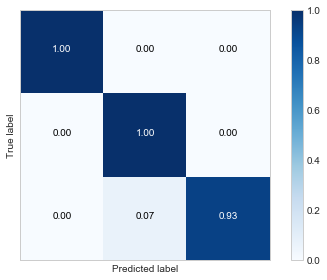

In [1494]:
model = svm.SVC(kernel='rbf', gamma=1.0, C=0.13)
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


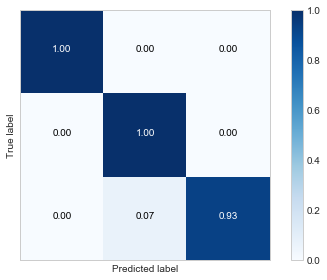

In [1495]:
model = svm.SVC(kernel='poly', degree=2, C=0.05)
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


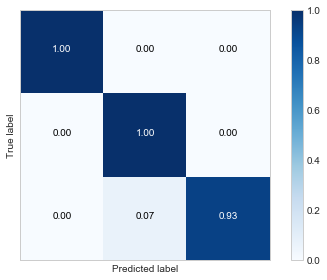

In [1505]:
model = svm.NuSVC(probability=True)
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  1.0

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

    avg / total       1.00      1.00      1.00        45

Normalized confusion matrix


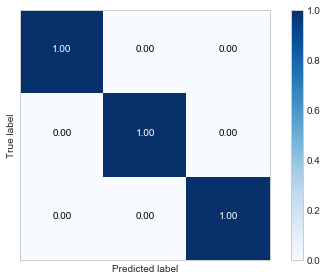

In [1500]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

Test accuracy:  0.9777777777777777

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

    avg / total       0.98      0.98      0.98        45

Normalized confusion matrix


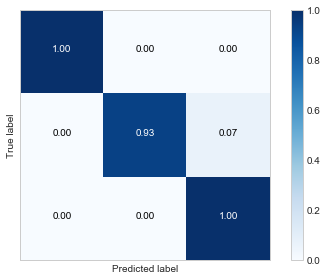

In [1498]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model = model.fit(X_train, y_train)

score_report(X_test, y_test)

In [1499]:
# ANN - MLP

In [1363]:
hyperparams = [
        {
            "activation" : ["identity", "logistic", "tanh", "relu"],
            "solver" : ["lbfgs", "sgd", "adam"],
            "hidden_layer_sizes": [(128, 256, 128,), (1, 5, 1,), (10, 50, 20,), (10, 10, 10,), (512,), (256, 512),
                                     (128, 128, 128, 128, 128,), (10, 10, 10, 10, 10, 10, 10, 10,), (512, 512, 512,),
                                     (1024,), (1024, 1024, 1024,), (512, 128, 10,), (60, 30, 10,), (1512, 1128, 110, 10,),
                                     (100, 100, 100, 100, 10,), (256,), (512,), (1024,), (2048,), (4000,), (6000,), (8000,)]
        }
       ]

In [1364]:
#[n for n in itertools.product([1, 2, 3, 4, 5, 6, 7, 8, 9], repeat=2)]

In [1365]:
# Solver lbfgs anbefales for mindre datasett.
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
hyperparams = [
        {
            "activation" : ["identity", "logistic", "tanh", "relu"],
            "solver" : ["lbfgs", "sgd", "adam"],
            "hidden_layer_sizes": [n for n in itertools.product([1, 2, 3, 4, 5, 6, 7, 8, 9], repeat=1)]
        }
       ]

In [1366]:
hyperparams = [
        {
            "activation" : ["relu"],
            "solver" : ["lbfgs"],
            "hidden_layer_sizes": [n for n in itertools.product([10, 20, 30, 40, 50, 60, 70, 80, 90], repeat=2)]
        }
       ]

In [1367]:
hyperparams = [
        {
            "activation" : ["identity", "logistic", "tanh", "relu"],
            "solver" : ["lbfgs"],
            "hidden_layer_sizes": [(10, 70, 50,), (30, 60, 80,), (10, 90, 80,)]
        }
       ]

In [1236]:
hyperparams = [
        {
            "activation" : ["relu"],
            "solver" : ["lbfgs"],
            "hidden_layer_sizes": [(6, 9,), (3, 9), (3, 3)]
        }
       ]

In [1310]:
# Train model using grid search
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(verbose=10, learning_rate="adaptive", max_iter=2000, random_state=1)

# CV = Cross-validation. Verbose = how often should it report back elapsed time.
#model = GridSearchCV(mlp, hyperparams, verbose=10, n_jobs=-1, cv=5)
model = GridSearchCV(mlp, hyperparams, verbose=10, n_jobs=3, cv=30)
model.fit(X_train, y_train)

print("\nCompleted grid search with best mean cross-validated score: ", model.best_score_)
print("Best hyperparams appears to be: ", model.best_params_)

model = model.best_estimator_

print("Test accuracy: ", model.score(X_test, y_test))

Fitting 30 folds for each of 12 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    4.4s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    6.2s
[Parallel(n_jobs=3)]: Done 107 tasks      | elapsed:   14.4s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:   22.3s
[Parallel(n_jobs=3)]: Done 139 tasks      | elapsed:   34.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   47.7s
[Parallel(n_jobs=3)]: Done 175 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Do


Completed grid search with best mean cross-validated score:  0.9411764705882353
Best hyperparams appears to be:  {'activation': 'identity', 'hidden_layer_sizes': (10, 70, 50), 'solver': 'lbfgs'}
Test accuracy:  1.0


[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:  2.1min finished


Test accuracy:  1.0

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

    avg / total       1.00      1.00      1.00        45

Normalized confusion matrix


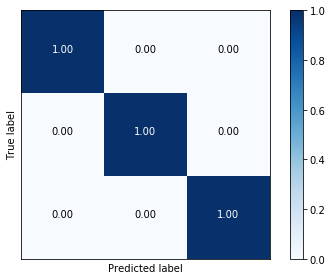

In [1311]:
score_report(X_test, y_test)